# Calibration of KITTI Poses
The file generate the calibrated poses from the original poses in KITTI dataset. The generated poses are in global frame.

In [92]:
import os
import yaml
import matplotlib.pyplot as plt

from utils_kitti import calibration, compute_poses, save_poses
from tools.fileloader import load_xyz_rot

# auto-reload external modules
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data
load kitti poses and calibration files

In [93]:
sequences_num = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
sequences_path = '/media/vectr/T7/Datasets/public_datasets/kitti/dataset/sequences'

sequences = []
for sequence_num in sequences_num:
    sequence = {}
    sequence['calib_path'] = os.path.join(sequences_path, sequence_num, 'calib.txt')
    sequence['poses_path'] = os.path.join(sequences_path, sequence_num, 'poses.txt')
    sequence['saving_path'] = os.path.join(sequences_path, sequence_num, 'poses')
    sequences.append(sequence)


## Calibration
The poses file in kitti is in camera frame, which should be transferred to lidar frame.

In [115]:
for i in range(len(sequences_num)):
    calib_path = sequences[i]['calib_path']
    poses_path = sequences[i]['poses_path']
    saving_path = sequences[i]['saving_path']
    
    # compute poses
    calib = calibration(calib_path)
    poses = compute_poses(poses_path, calib)

    # save poses in a .txt file
    if not os.path.exists(saving_path):
        os.makedirs(saving_path)
    save_poses(os.path.join(saving_path, 'poses.txt'), poses)
    

## Visualize Calibrated Position (Option) 


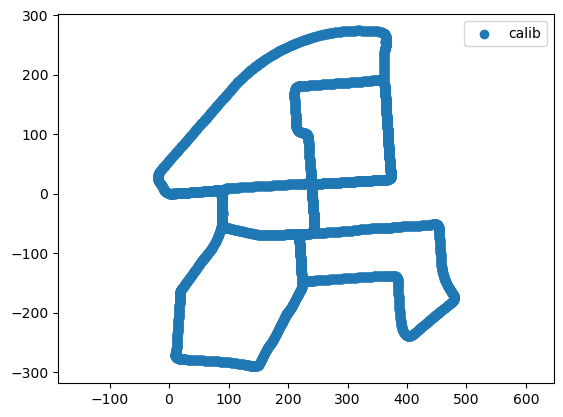

In [116]:
seq = 0
poses_calib_path = f'/media/vectr/T7/Datasets/public_datasets/kitti/dataset/sequences/{str(seq).zfill(2)}/poses/poses.txt'
poses_raw_path = f'/media/vectr/T7/Datasets/public_datasets/kitti/dataset/sequences/{str(seq).zfill(2)}/poses.txt'

poses_calib, _ = load_xyz_rot(poses_calib_path)
poses_raw, _ = load_xyz_rot(poses_raw_path)

plt.scatter(poses_calib[:, 0], poses_calib[:, 1], label='calib')
# plt.scatter(poses_raw[:, 0], poses_raw[:, 1], label='original')
plt.legend()
plt.axis('equal')
plt.show()